In [21]:
import json
import pickle as cPickle
import numpy as np

from sklearn import svm
import sklearn.utils
from scipy.sparse import csr_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


from collections import defaultdict
import math
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import spearmanr
from sklearn import linear_model
import re
import copy

import seaborn as sns
import pandas as pd
import scipy.stats
import statsmodels.stats.proportion
from sklearn.cross_validation import LeaveOneOut
from prediction_utils.show_examples import update, generate_snapshots, clean
from prediction_utils.features2vec import _get_term_features, _get_last_n_action_features, \
            _get_action_features, _get_repeatition_features, _get_balance_features, documents2feature_vectors

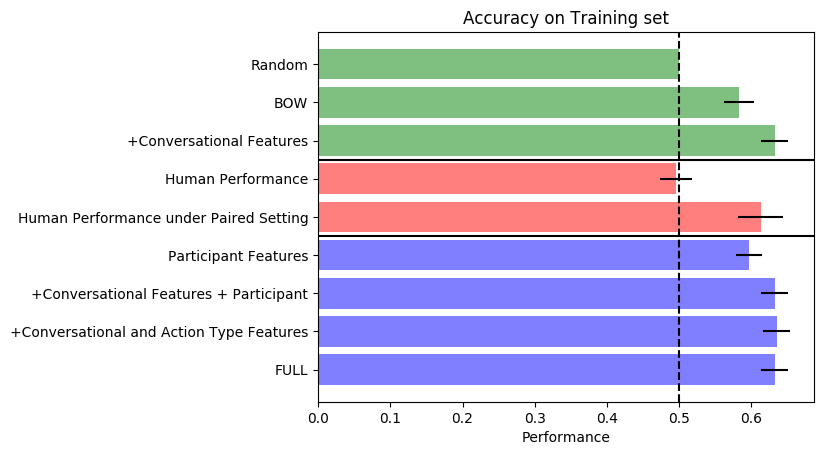

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# conv+user C = 0.0007
# BOW C= 0.001
# conv only C = 0.0009
# conv+ modi C=0.0007
# FULL C = 0.0009
# User only C = 0.5

methods = ('Random', 'BOW', '+Conversational Features', 'Human Performance', \
           'Human Performance under Paired Setting', 'Participant Features',\
           '+Conversational Features + Participant', '+Conversational and Action Type Features', 'FULL')
y_pos = np.arange(len(methods))
performance = (0.5, 0.583, 0.632, 0.496, 0.613, 0.596, 0.632, 0.635, 0.632)
error = (0, 0.021, 0.019, 0.022, 0.031, 0.018, 0.019, 0.019, 0.019)
ax.barh(y_pos, performance, xerr=error, align='center',
        color=['green', 'green', 'green', 'red', 'red', 'blue', 'blue', 'blue', 'blue'], ecolor='black', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Accuracy on Training set')
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axhline(y=2.5, color='k', linestyle='-')
plt.axhline(y=4.5, color='k', linestyle='-')
plt.show()